In [1]:
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
milk=pd.read_csv('milk.csv',index_col=0)
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [3]:
scaler=StandardScaler()
milk_scaled=scaler.fit_transform(milk)

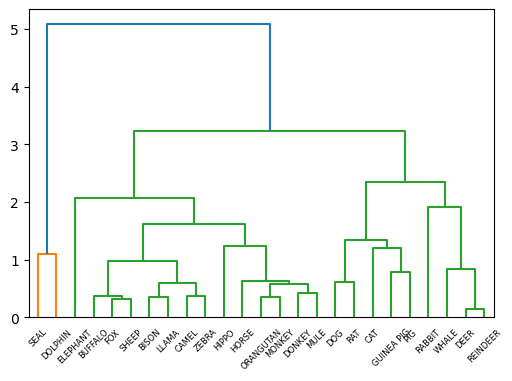

In [21]:
plt.figure(figsize=(6,4))
mergings=linkage(milk_scaled,method='average')
dendrogram(mergings,labels=list(milk.index),leaf_rotation=45,leaf_font_size=6)
plt.show()

## Agglomerative clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

In [24]:
clustering=AgglomerativeClustering(n_clusters=2,linkage='average')

In [25]:
pipe=Pipeline([('SCL',scaler),('CLUST',clustering)])

In [29]:
milk_scaled=scaler.fit_transform(milk)

In [30]:
pipe.fit(milk)

Pipeline(steps=[('SCL', StandardScaler()),
                ('CLUST', AgglomerativeClustering(linkage='average'))])

In [31]:
print(clustering.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]


In [32]:
print(silhouette_score(milk_scaled,clustering.labels_))

0.5186847578981009
